<a href="https://colab.research.google.com/github/yvishyst/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!











In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
plot_data = df.tail(1)[[col for col in df.columns if ('_pct') in col]].T.set_index(keys=np.arange(1,11))
plot_data

,80052
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


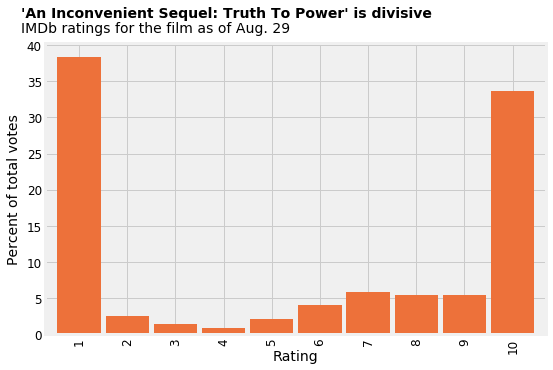

In [3]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,5),facecolor='white',frameon=False,clear=True)
ax = fig.add_subplot(1,1,1)
plot_data.plot(kind='bar',ax=ax,legend=False,color='#ED713A',width=0.9,fontsize=12);
left,right = ax.get_xlim()
bottom, top = ax.get_ylim()
ax.text(left-0.5,(top+bottom)*0.5,s="Percent of total votes",horizontalalignment='right',verticalalignment='center',rotation='vertical')
ax.text((left+right)*0.5,bottom-2,s="Rating",horizontalalignment='center',verticalalignment='top')
ax.text(left-0.5,top+3.5,s="'An Inconvenient Sequel: Truth To Power' is divisive",fontweight='bold')
ax.text(left-0.5,top+1.5,s="IMDb ratings for the film as of Aug. 29")
X = np.linspace(left,right,100)
Y = np.linspace(bottom-5,bottom-5,100)
#ax.plot(X,Y,linestyle="-", linewidth=0.5, color='green', zorder=-10)

# ax.text(x=(ax.get_xlim()[0]-0.5),y=(ax.get_ylim()[0]-5),s="FiveThirtyEight")

In [4]:
ax.plot(X,Y,linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# STRETCH OPTIONS

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).


### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here